<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%2010/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_10_%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Structure of the Dataset
        


<div style = "color: Black; display: fill;
              border-radius: 5px;
              background-color: #FFC18E;
              font-size: 100%;
              font-family: Verdana">
    <p style = "padding: 3px; color: Black;">
    <ul> 📌 <b>BHK</b> - Number of Bedrooms, Hall, Kitchen<br>
         📌 <b>Rent</b> - Price of the Houses/Apartments/Flats<br>
         📌 <b>Size</b> - Size of the Houses/Apartments/Flats in Square Feet<br>
         📌 <b>Floor</b> - Houses/Apartments/Flats situated in which Floor and Total Number of Floors<br>
         📌 <b>Area Type</b> - Size of the Houses/Apartments/Flats calculated on<br>
         📌 <b>Area Locality</b> - Locality of the Houses/Apartments/Flats<br>
         📌 <b>City</b> - City where the Houses/Apartments/Flats are Located<br>
         📌 <b>Furnishing Status</b> - Furnishing Status of the Houses/Apartments/Flats<br>
         📌 <b>Tenant Preferred</b> - Type of Tenant Preferred by the Owner or Agent<br>
         📌 <b>Bathroom</b> - Number of Bathrooms<br>
         📌 <b>Point of Contact</b> - Whom should you contact for more information regarding the Houses/Apartments/Flats<br>
    <p style = "padding: 11px; color: Black;">
        


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Importing Libraries
        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.diagnostic import linear_reset
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import t
from scipy import stats
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_curve, auc,
                            precision_score, recall_score, f1_score,
                            roc_auc_score)

def draw_corr_matrix(data, figsize=(8, 6)):
  # Вычисление корреляционной матрицы
  corr_matrix = data.corr()

  # Создание маски для верхней треугольной части(просто для красоты и удобства)
  # Функция np.triu создает верхнюю треугольную матрицу из массива единиц (np.ones_like),
  # где все элементы выше главной диагонали равны True, а остальные — False.
  mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

  # Построение тепловой карты
  plt.figure(figsize=figsize)
  sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
  plt.title("Корреляционная матрица (только нижняя половина)")
  plt.show()


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Loading the Dataset
        

In [2]:
rent_df = pd.read_csv("House_Rent_Dataset.csv")
rent_df.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2488,2022-07-04,2,12000,700,Ground out of 4,Super Area,Sultanpur,Delhi,Unfurnished,Bachelors/Family,2,Contact Owner
3944,2022-05-12,2,18000,1200,5 out of 6,Super Area,Chanda Nagar,Hyderabad,Unfurnished,Bachelors/Family,3,Contact Owner
3263,2022-04-29,2,7500,850,Ground out of 2,Super Area,Anakaputhur,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
2175,2022-06-04,1,6000,500,2 out of 3,Super Area,"Electronic City Phase 2, Electronic City",Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
1948,2022-05-14,1,6000,400,3 out of 4,Super Area,Hongasandra,Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Checking Shape of the Dataset
        

In [3]:
rent_df.shape

(4746, 12)


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Checking all the Columns in the Dataset
        

In [4]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Information about the Dataset


In [5]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Checking if there is any Null value present in the Dataset?


In [7]:
rent_df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Checking if there is any Duplicate value present in the Dataset?
        

In [8]:
rent_df.duplicated().sum()

np.int64(0)


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Checking Mean, Median, Maximum & Minimum House Rents
        

In [9]:
print("Mean House Rent:", round(rent_df["Rent"].mean()))

print("Median House Rent:", round(rent_df["Rent"].median()))

print("Highest House Rent:", round(rent_df["Rent"].max()))

print("Lowest House Rent:", round(rent_df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>5 Highest House Rents present in the Dataset
        

In [10]:
rent_df["Rent"].sort_values(ascending = False)[:5]

,Rent
1837,3500000
1001,1200000
827,1000000
1329,850000
1459,700000



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>5 Lowest House Rents present in the Dataset
        

In [11]:
rent_df["Rent"].sort_values()[:5]

,Rent
4076,1200
285,1500
471,1800
2475,2000
146,2200



<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Bar Plot for Number of House in Each City which is Available for Rent
        

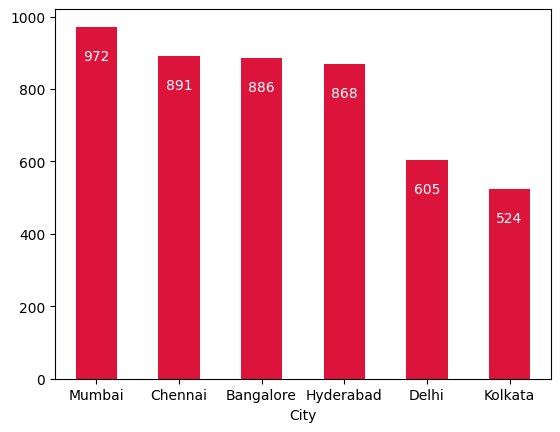

In [12]:
# plt.figure(figsize = (15, 6))
ax = rent_df["City"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'white')


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Bar Plot on Different Types of Furnishing Status
        

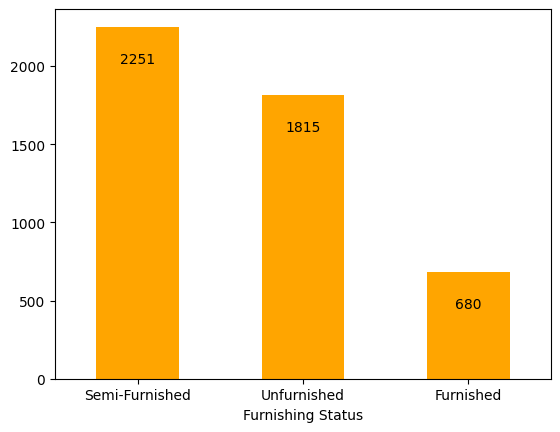

In [53]:
# plt.figure(figsize = (20, 6))
ax = rent_df["Furnishing Status"].value_counts().plot(kind = 'bar',
                                                      color = "Orange",
                                                      rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250),
                ha = 'center',
                va = 'bottom',
                color = 'Black')


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Bar Plot on Different Types of Tenant Preferred
        

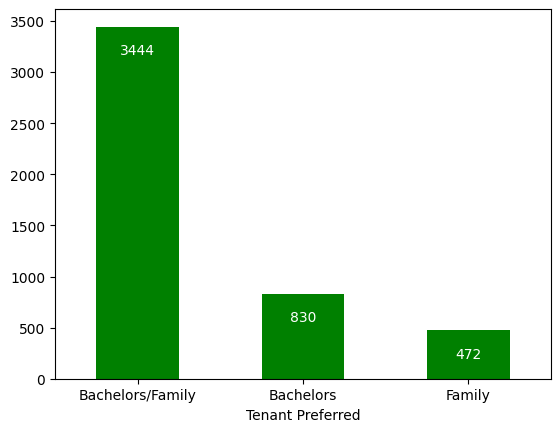

In [14]:
# plt.figure(figsize = (20, 6))
ax = rent_df["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300),
                ha = 'center',
                va = 'bottom',
                color = 'White')


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Pie Plot on Cities to check the distribution
        

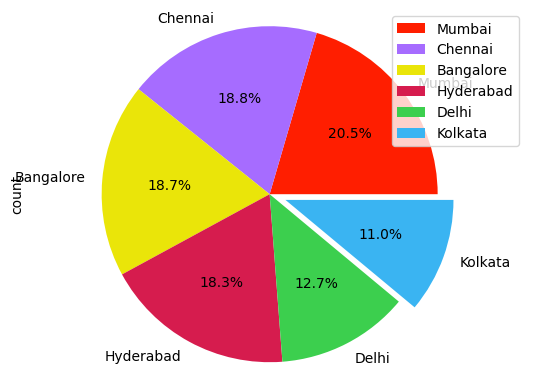

In [15]:
# plt.figure(figsize = (20, 8))
counts = rent_df["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Scatter Plot on House Rents vs House Sizes
        

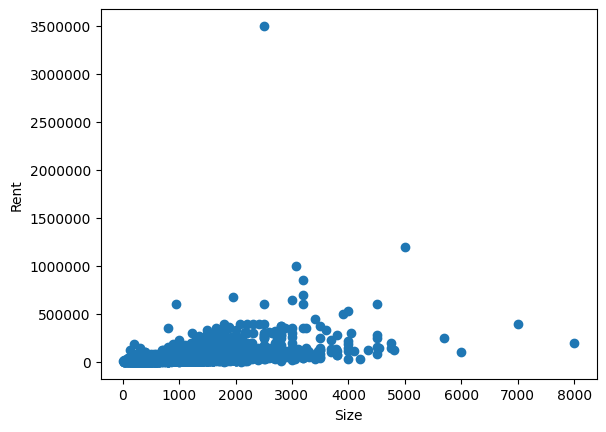

In [16]:
# plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(rent_df["Size"], rent_df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Bar Plot for City vs House Rent
        

<ipython-input-17-b376956d6bbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rent_df["City"], y = rent_df["Rent"], palette = "nipy_spectral");


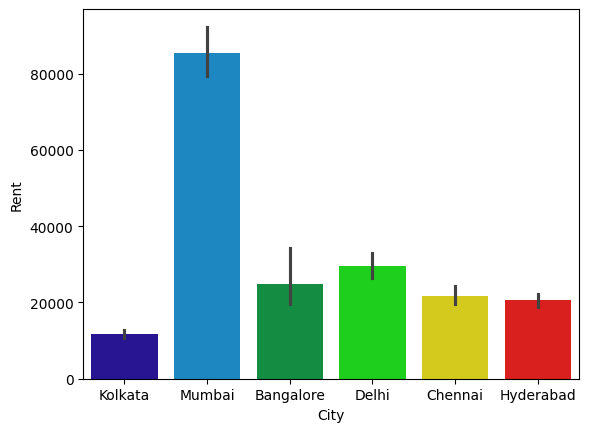

In [17]:
# plt.figure(figsize = (20, 7))
sns.barplot(x = rent_df["City"], y = rent_df["Rent"], palette = "nipy_spectral");


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Histogram on House Sizes
        

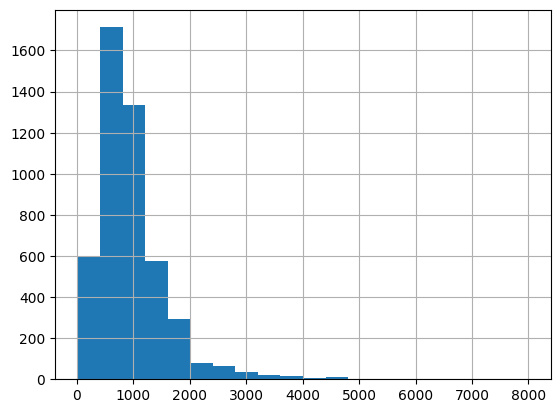

In [18]:
n_bins = 20
# plt.figure(figsize = (20, 6))
rent_df["Size"].hist(bins = n_bins);


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Distribution of different number of BHK available in the Dataset
        

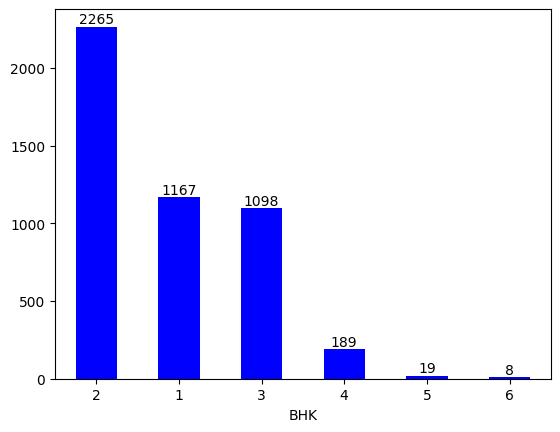

In [19]:
# plt.figure(figsize = (30, 10))
ax = rent_df["BHK"].value_counts().plot(kind = 'bar',
                                        color = "Blue",
                                        rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Distribution of different number of Bathrooms available in the Dataset
        

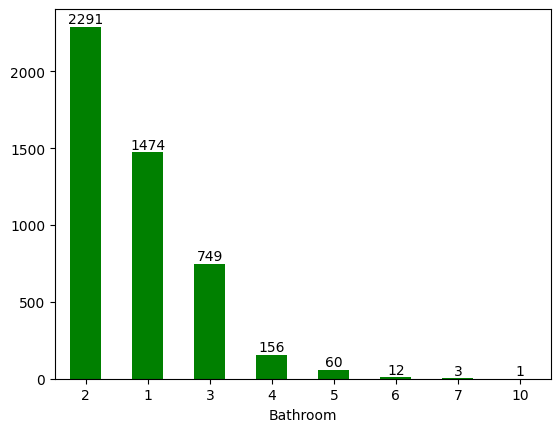

In [20]:
# plt.figure(figsize = (30, 10))
ax = rent_df["Bathroom"].value_counts().plot(kind = 'bar',
                                             color = "Green",
                                             rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')


<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>WordCloud on Area Locality
        

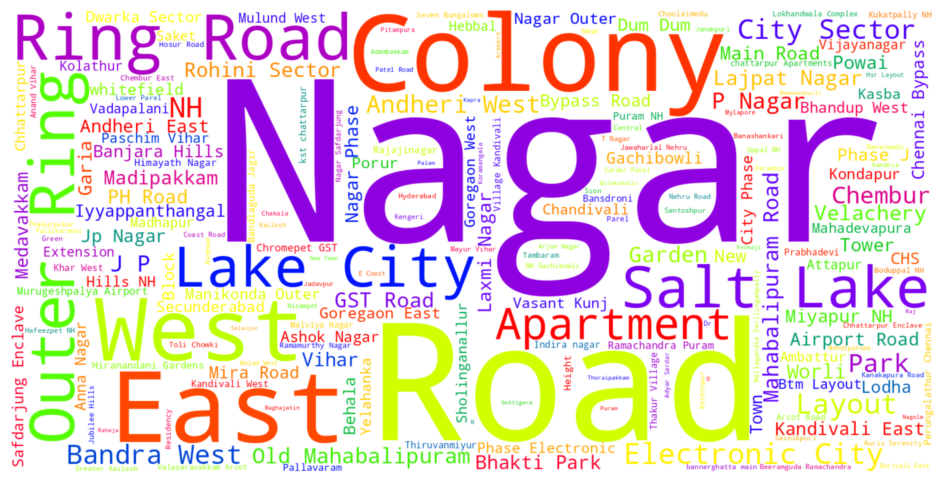

In [21]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(Company for Company in rent_df["Area Locality"])
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'prism',
                       background_color = "white").generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

<Axes: >

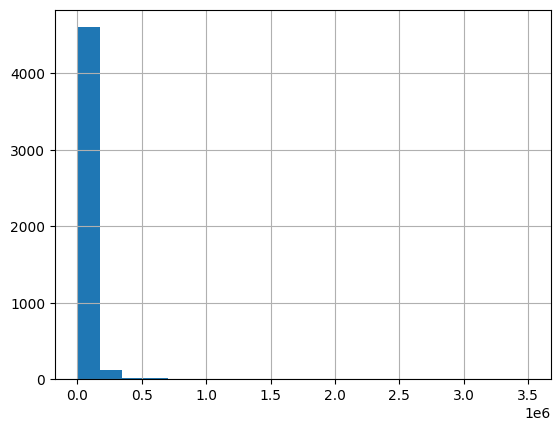

In [22]:
df = rent_df.copy()

df['Rent'].hist(bins=20)

<Axes: xlabel='Rent'>

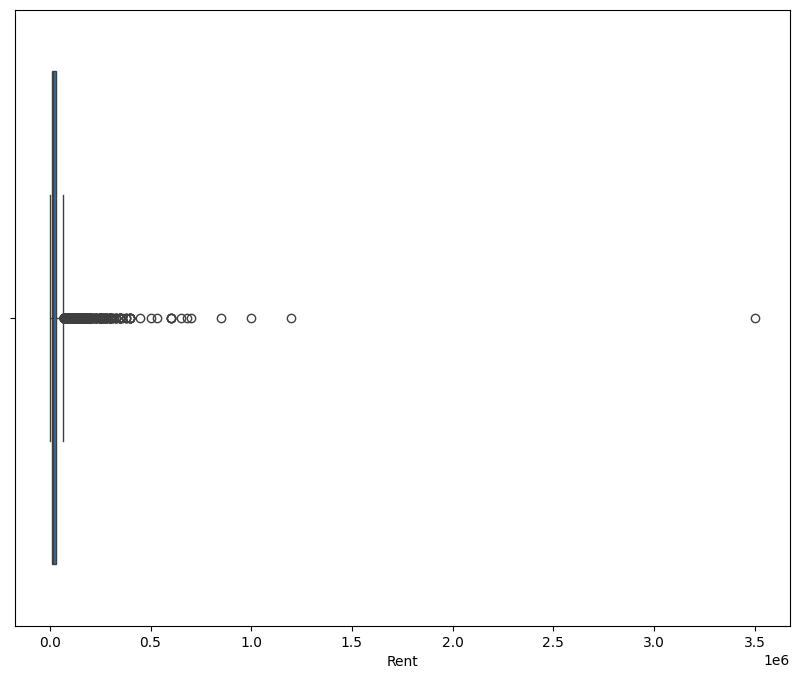

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Rent'], orient='h')

In [24]:
df['Rent'].sort_values(ascending=False).head()

,Rent
1837,3500000
1001,1200000
827,1000000
1329,850000
1459,700000


<Axes: >

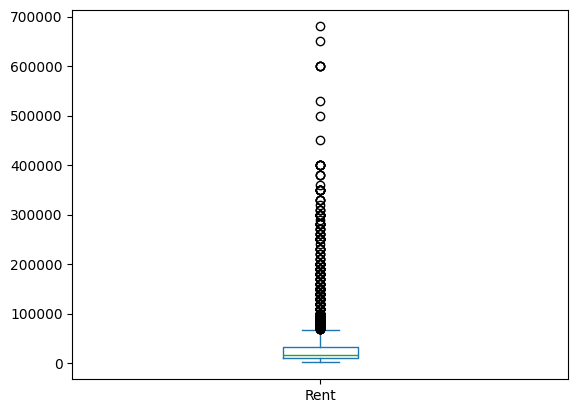

In [25]:
df['Rent'].loc[df['Rent'] < 700000].plot(kind='box')

<Axes: >

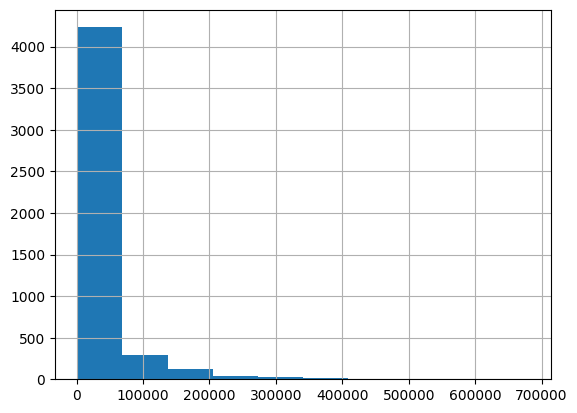

In [26]:
df['Rent'].loc[df['Rent'] < 700000].hist()

In [27]:
df['Posted On'] = pd.to_datetime(df['Posted On'], format='%Y-%m-%d').astype(int) // 10**9

In [28]:
enc = LabelEncoder()

features_cat = df.select_dtypes('object').columns

for col in features_cat:
  df[col] = enc.fit_transform(df[col])

In [29]:
list_of_params = [
    'Posted On', 'BHK', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'
]

X = df[list_of_params]
y = df['Rent']

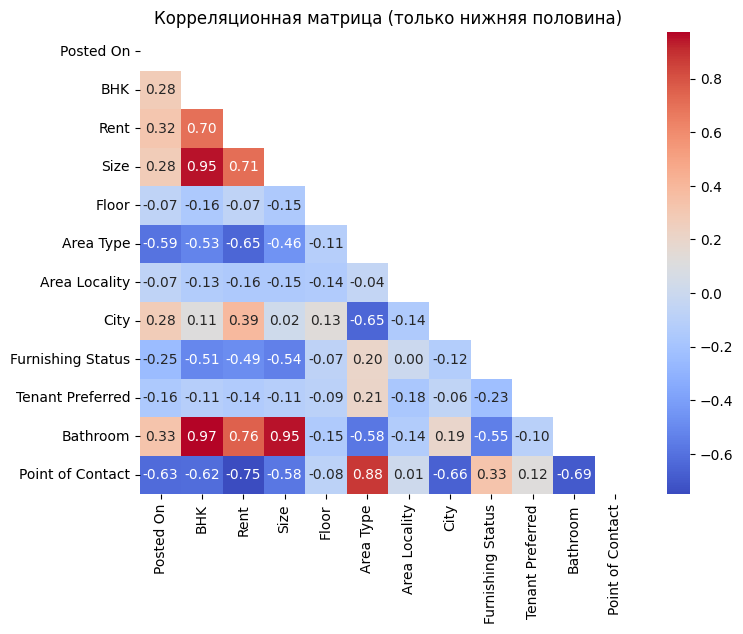

In [30]:
draw_corr_matrix(df.corr())

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

print(r2_score(y_test, lm_prediction))

0.3981121779129917


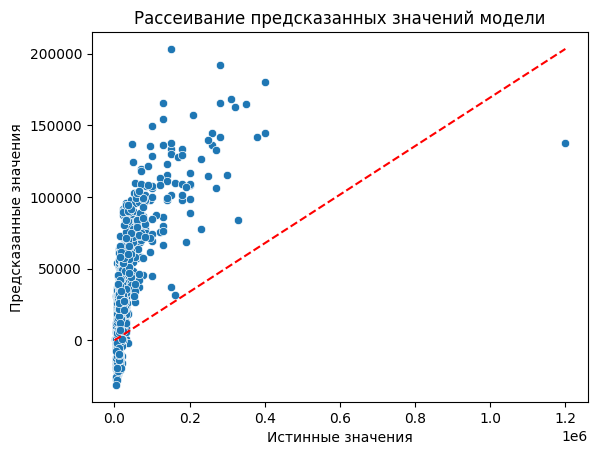

In [33]:
sns.scatterplot(x=y_test, y=lm_prediction)
plt.title("Рассеивание предсказанных значений модели")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, max(y_test)], [0, max(lm_prediction)], color='r', linestyle='--')
plt.show()

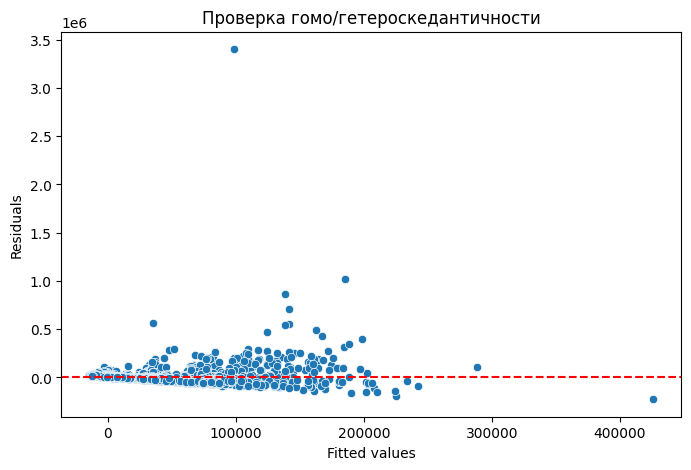

In [43]:
# --- 📘 Теория: Гомоскедантичность и гетероскедантичность ---
# Гомоскедантичность означает, что дисперсия ошибок регрессионной модели одинакова на всех уровнях независимых переменных.
# Гетероскедантичность — это ситуация, при которой дисперсия ошибок меняется (обычно растет) в зависимости от значения предиктора.
# Это нарушает одно из базовых предположений линейной регрессии и делает оценки неэффективными.

# --- 💡 Проверка гетероскедантичности ---
# Мы построим регрессию: Rent ~ Size + BHK
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

X = rent_df.drop('Rent', axis=1).select_dtypes('number')
y = rent_df['Rent']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Остатки
residuals = model.resid

# График остатков
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Проверка гомо/гетероскедантичности')
plt.show()

# --- 📊 Тест Бройша-Пагана ---
# Формальный тест на гетероскедантичность
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value']
# print(dict(zip(labels, bp_test)))
# print(f"{bp_test[1]:.3f}")


🧠 Гипотезы

H₀ (нулевая гипотеза): Ошибки гомоскедастичны (дисперсия одинакова для всех наблюдений).

H₁ (альтернатива): Ошибки гетероскедастичны (дисперсия зависит от X).

| Метод                                          | Суть                                                          | Когда применять                                  |
| ---------------------------------------------- | ------------------------------------------------------------- | ------------------------------------------------ |
| **Логарифмирование зависимой переменной**      | Преобразование `Y` в `log(Y)` сглаживает дисперсию            | Часто помогает при экспоненциальной зависимости  |
| **Удаление/обработка выбросов**                | Иногда гетероскедантичность вызвана экстремальными значениями | Проверить распределения                          |
| **Box-Cox трансформация**                      | Обобщённая версия лог-преобразования                          | Когда форма функции неизвестна                   |
| **Взвешенная МНК (WLS)**                       | Назначаются веса обратные дисперсии ошибок                    | Когда можно оценить дисперсию ошибок             |
| **Робастные стандартные ошибки (Huber-White)** | Не исправляет ошибки, но делает корректные стандартные ошибки | Если модель хороша, но остатки гетероскедастичны |


0.3981121779129919


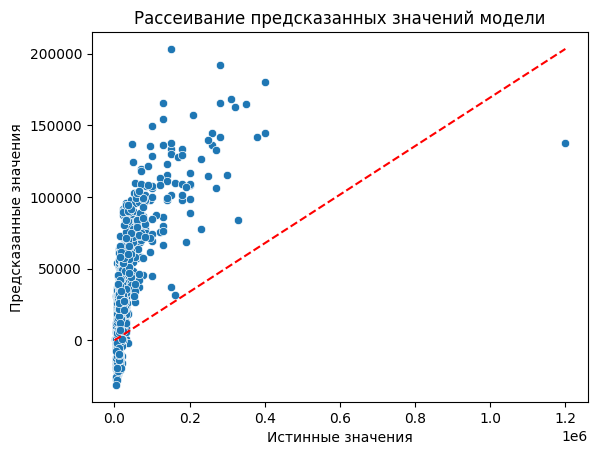

In [44]:
# Стандартизация значений признаков для их соразмерности и улучшения анализа
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_scaled,y_train)
lm_prediction = lm.predict(X_test_scaled)

print(r2_score(y_test, lm_prediction))

sns.scatterplot(x=y_test, y=lm_prediction)
plt.title("Рассеивание предсказанных значений модели")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, max(y_test)], [0, max(lm_prediction)], color='r', linestyle='--')
plt.show()

In [45]:
# Удаление выбросов и обучение модели

df_without_outlnes = df.loc[df['Rent'] < 700000]

X = df_without_outlnes.drop('Rent', axis=1)
y = df_without_outlnes['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

print(r2_score(y_test, lm_prediction))

0.5129406815964253


0.5266094527004865


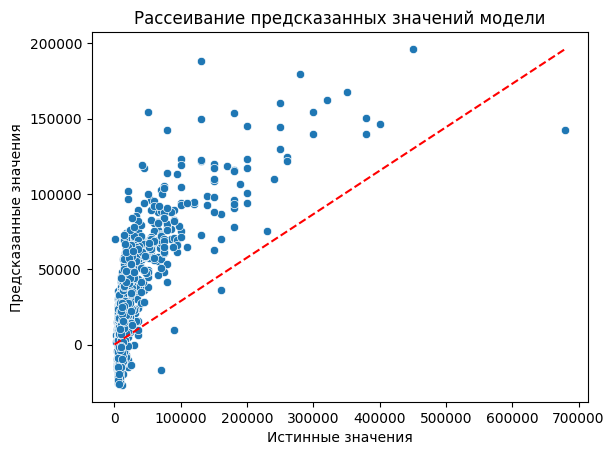

In [46]:
# Генерация полиномиальных признаков + Удаление выбросов
poly = PolynomialFeatures(degree=2, include_bias=False)

# Генерируем полиномиальные признаки для обучающей выборки
X_train_poly = poly.fit_transform(X_train)

# Преобразуем тестовую выборку
X_test_poly = poly.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly,y_train)
lm_prediction = lm.predict(X_test_poly)

print(r2_score(y_test, lm_prediction))

sns.scatterplot(x=y_test, y=lm_prediction)
plt.title("Рассеивание предсказанных значений модели")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, max(y_test)], [0, max(lm_prediction)], color='r', linestyle='--')
plt.show()

0.7751535064857955


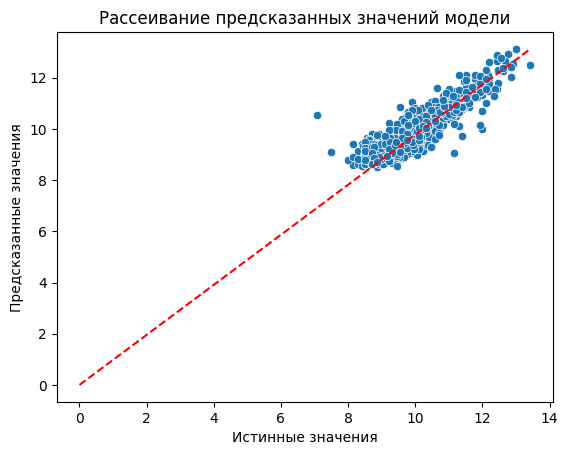

In [47]:
# Стандартизация + Полиномиал + удаленные выбросы + Логарифмирование

scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)

X = df_without_outlnes.drop('Rent', axis=1)
y = np.log(df_without_outlnes['Rent'])

X = poly.fit_transform(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

print(r2_score(y_test, lm_prediction))
sns.scatterplot(x=y_test, y=lm_prediction)
plt.title("Рассеивание предсказанных значений модели")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, max(y_test)], [0, max(lm_prediction)], color='r', linestyle='--')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor

rm = RandomForestRegressor()
rm.fit(X_train,y_train)
rm_prediction = rm.predict(X_test)

print(r2_score(y_test, rm_prediction))

0.8180089032806421


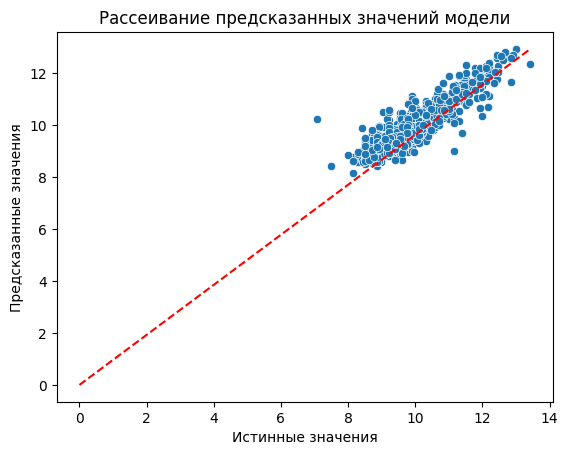

In [49]:
sns.scatterplot(x=y_test, y=rm_prediction)
plt.title("Рассеивание предсказанных значений модели")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.plot([0, max(y_test)], [0, max(rm_prediction)], color='r', linestyle='--')
plt.show()

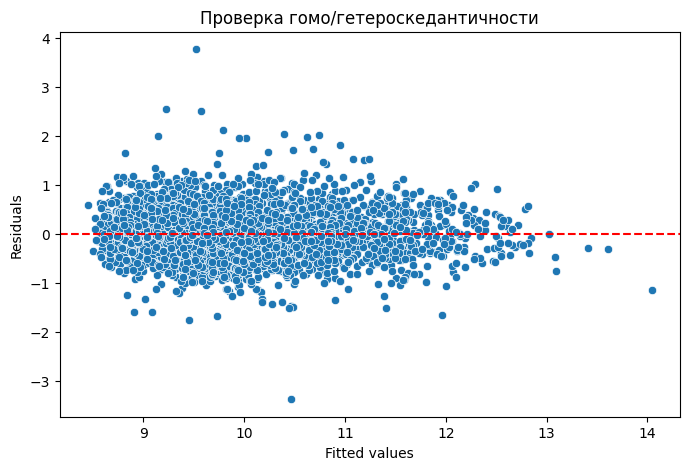

{'Lagrange multiplier statistic': np.float64(231.02201220861355), 'p-value': np.float64(2.6501946865654963e-17)}
0.000


In [50]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Остатки
residuals = model.resid

# График остатков
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Проверка гомо/гетероскедантичности')
plt.show()

# --- 📊 Тест Бройша-Пагана ---
# Формальный тест на гетероскедантичность
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value']
print(dict(zip(labels, bp_test)))
print(f"{bp_test[1]:.3f}")

## Основная идея PCA
PCA преобразует исходные данные в новое пространство, где:

1. Главные компоненты — это новые оси (признаки), которые строятся как линейные комбинации исходных признаков.
2. Главные компоненты упорядочены по важности: первая компонента объясняет наибольшую дисперсию данных, вторая — следующую по величине дисперсию и так далее.
3. Новые оси (главные компоненты) ортогональны друг другу, что обеспечивает независимость между компонентами.

## Цели использования PCA
- Уменьшение размерности данных :
- Обнаружение скрытых закономерностей :
- Шумоподавление : Удаление менее важных компонентов, которые могут быть связаны с шумом в данных.
- Визуализация данных

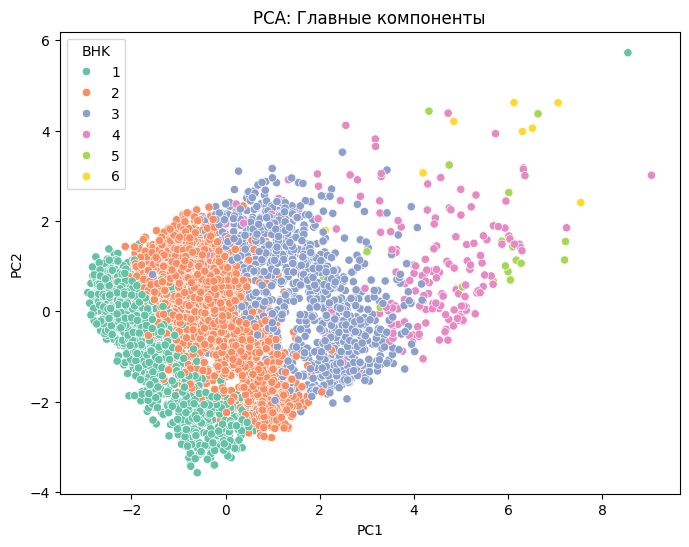

In [51]:

# --- 📘 Теория: Метод главных компонент (PCA) ---
# PCA позволяет уменьшить размерность данных, сохранив максимум дисперсии.
# Это особенно полезно при работе с многомерными признаками (например, при наличии мультиколлинеарности).

# --- 💡 Применим PCA ---
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Стандартизация
X = df.drop('Rent', axis=1)
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Добавим в датафрейм
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# --- 🔍 Визуализация компонент ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='BHK', palette='Set2')
plt.title('PCA: Главные компоненты')
plt.show()